In [3]:
from blimpy import Waterfall
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

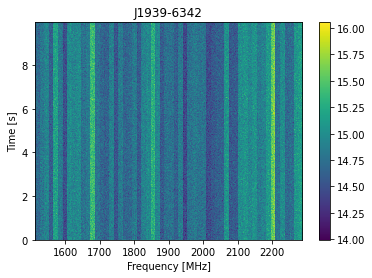

In [8]:
# Load and plot multi-antenna filterbank file:
multi_ant = 'guppi_59143_54504_000454_J1939-6342_0001.rawspec.0000.fil'
multi_wf = Waterfall(multi_ant)
multi_wf.plot_waterfall()
plt.show()

Notice the vertical strips - each of these corresponds with a small piece of the band from a single antenna. Each strip is the same piece of the band, but for a single antenna. The ticks and labels for the frequency axis are therefore incorrect in this default plot. 
In this filterbank file (from MeerKAT), there are 58 antennas present. 

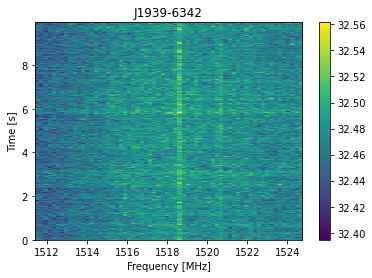

In [9]:
inc = 'guppi_59143_54504_000454_J1939-6342_0001-ics.rawspec.0000.fil'
inc_wf = Waterfall(inc)
inc_wf.plot_waterfall()
plt.show()

This filterbank file displays an incoherent sum - in this case, essentially the element-wise sum of each strip from the plot above.

Next, we can perform our own incoherent sum on the data from the first plot and verify that they are identical:

In [10]:
def inc_sum(nants, spectra):
    """Perform an incoherent sum on filterbank waterfall plot.
    
    nants (int):  number of antennas 
    spectra (numpy matrix): the waterfall plot
    
    Returns inc (numpy matrix), the incoherent sum. 
    """
    ant_chan = int(spectra.shape[1]/nants)
    inc = np.reshape(spectra, (spectra.shape[0],
        int(spectra.shape[1]/ant_chan), ant_chan))
    inc = np.sum(inc, axis = 1)
    return inc

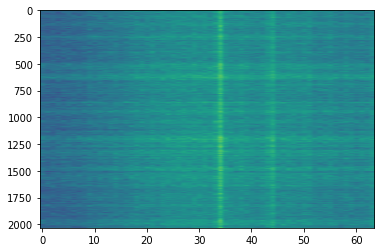

In [13]:
inc_new = inc_sum(58, multi_wf.data[:, 0, :])
plt.imshow(inc_new, aspect = 'auto')
plt.show()

We can perform an element-wise comparison of our manually-created incoherent sum and the provided incoherent sum as follows:

In [15]:
inc_flattened = np.ravel(inc_wf.data)
inc_new_flattened = np.ravel(inc_new)
comparison = np.sum(inc_new_flattened - inc_flattened) # Elementwise subtraction
print(comparison) # If this is not 0, something is different

0.0
